In [109]:
import numpy as np
from copy import deepcopy
from tqdm import tqdm_notebook

In [110]:
import matplotlib.pyplot as plt

In [111]:
with open('data/6.txt', 'r') as f:
    star_data = f.read().split('\n')
    star_data = np.array([list(x) for x in star_data])

In [112]:
star_data[star_data == '.'] = 0
star_data[star_data == '#'] = 2
star_data[star_data == '^'] = 1
star_data = star_data.astype(int)
star_data[star_data == 2] = -1

In [113]:
data = deepcopy(star_data)

In [114]:
next_direction = {
    (-1, 0): (0, 1),
    (0,1): (1, 0),
    (1,0): (0, -1),
    (0, -1): (-1, 0),
}

In [115]:
was_here = {
    (-1, 0): 1,
    (0, 1): 2,
    (1, 0): 4,
    (0, -1): 8 
}

In [116]:
def step(pos, direction):
    new_pos = [pos[0]+direction[0], pos[1] + direction[1]]
    if (data.shape[0] == new_pos[0]) or (new_pos[0] < 0) or (data.shape[1] == new_pos[1]) or (new_pos[1] < 0):
        return False
    if data[*new_pos] != -1:
        data[*new_pos] = 1
        return new_pos, direction
    else:
        return pos, next_direction[direction]

In [117]:
start_pos = np.where(data == 1)
pos = (start_pos[0][0], start_pos[1][0])
direction = (-1, 0)
data[*start_pos] = 1

In [118]:
while True:
    pos, direction = step(pos, direction)

TypeError: cannot unpack non-iterable bool object

In [119]:
np.sum(data == 1)

5516

In [120]:
possible_places = np.where(data == 1)

In [121]:
def step_2(pos, direction):
    new_pos = [pos[0]+direction[0], pos[1] + direction[1]]
    if (data.shape[0] == new_pos[0]) or (new_pos[0] < 0) or (data.shape[1] == new_pos[1]) or (new_pos[1] < 0):
        return False
    if data[*new_pos] == -1:
        return pos, next_direction[direction]
    if data[*new_pos] & was_here[direction]:
        return True
    data[*new_pos] |= was_here[direction]
    return new_pos, direction

        

In [122]:
total_bricks = 0
for x, y in tqdm_notebook(zip(possible_places[0], possible_places[1])):
    data = deepcopy(star_data)
    data[x, y] = -1
    data[start_pos[0][0], start_pos[1][0]] = 1
    pos = (start_pos[0][0], start_pos[1][0])
    direction = (-1, 0)
    res = (1,)
    while True:
        res = step_2(pos, direction)
        if type(res) is bool:
            total_bricks += int(res)
            break
        pos, direction = res

/var/folders/0p/8h87y7r9307143fb5t7nn_j40000gn/T/ipykernel_7747/3393593549.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x, y in tqdm_notebook(zip(possible_places[0], possible_places[1])):


0it [00:00, ?it/s]

In [123]:
total_bricks

2008

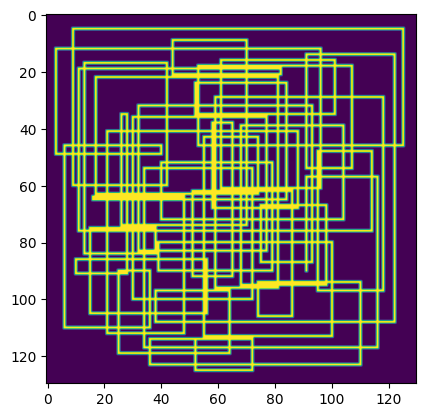

In [124]:
plt.imshow(data>0)